In [53]:
import pandas as pd

In [54]:
df=pd.read_csv('customer_churn_data.csv')

In [55]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [57]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [58]:
df['InternetService']= df['InternetService'].fillna("")

In [59]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [60]:
df.duplicated().sum()

np.int64(0)

In [61]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [62]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Churn (yes/no)')

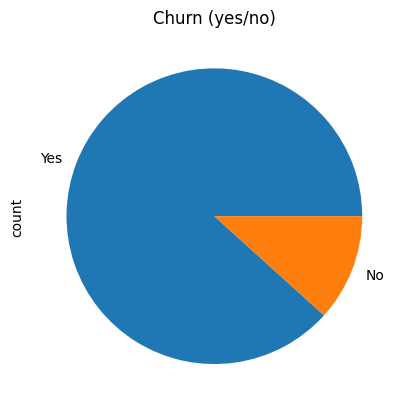

In [63]:
df['Churn'].value_counts().plot(kind='pie')
plt.title("Churn (yes/no)")

In [64]:
df.groupby("Churn")['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [65]:
df.groupby(["Churn","Gender"])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

Text(0.5, 1.0, 'ContractType vs MonthlyCharge')

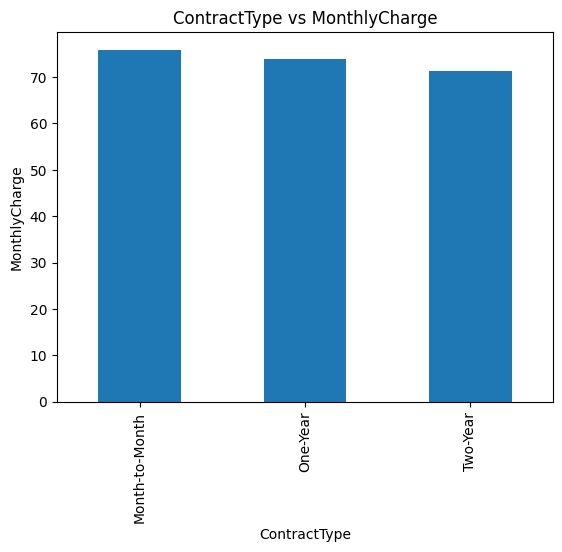

In [66]:
df.groupby("ContractType")['MonthlyCharges'].mean().plot(kind="bar")
plt.xlabel("ContractType")
plt.ylabel("MonthlyCharge")
plt.title("ContractType vs MonthlyCharge")

Text(0.5, 1.0, 'Histogram of Monthly charges')

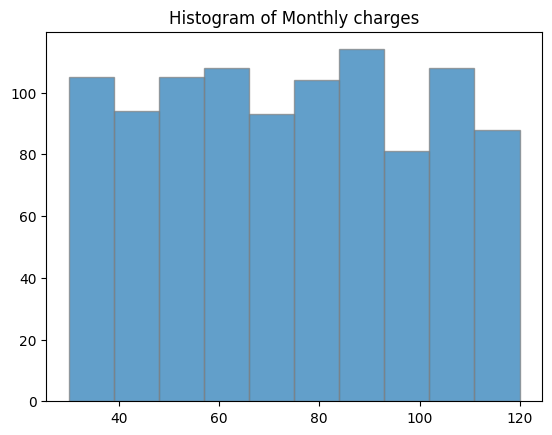

In [67]:
plt.hist(df['MonthlyCharges'], alpha=0.7, edgecolor='grey')
plt.title("Histogram of Monthly charges")

(array([490., 233., 127.,  64.,  36.,  30.,  13.,   2.,   4.,   1.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

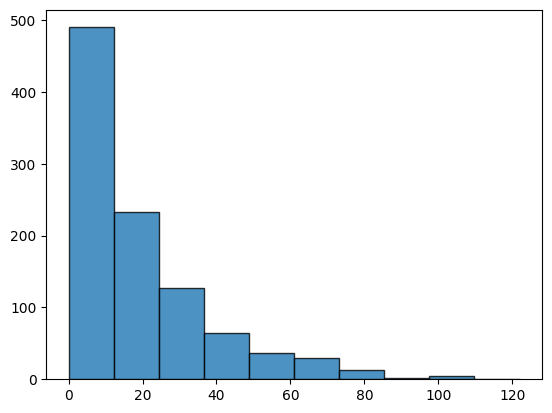

In [68]:
plt.hist(df["Tenure"], alpha=0.8, edgecolor= 'black')

In [69]:
df["Gender"]=df["Gender"].map({"Male":1, "Female":0})
X= df[["Age", "Gender", "Tenure", "MonthlyCharges"]]
X

,Age,Gender,Tenure,MonthlyCharges
0,49,1,4,88.35
1,43,1,0,36.67
2,51,0,2,63.79
3,60,0,8,102.34
4,42,1,32,69.01
...,...,...,...,...
995,42,1,41,37.14
996,62,1,9,80.93
997,51,0,15,111.72
998,39,1,68,65.67


In [70]:
y= df["Churn"]
y.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Churn, dtype: object

In [71]:
y= y.apply(lambda x: 1 if x=="Yes" else 0)
y.value_counts()

Churn
1    883
0    117
Name: count, dtype: int64

In [72]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train.isna().sum()

Age               0
Gender            0
Tenure            0
MonthlyCharges    0
dtype: int64

In [75]:
X_train_scaled = scaler.fit_transform(X_train)
X_train= X_train_scaled

In [76]:
import joblib

In [77]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [78]:
scaled_X_test=scaler.transform(X_test)

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
log_model= LogisticRegression()

In [82]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [83]:
y_pred=log_model.predict(scaled_X_test)

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay


In [85]:
Accuracy = accuracy_score(y_test, y_pred)
Accuracy

0.885

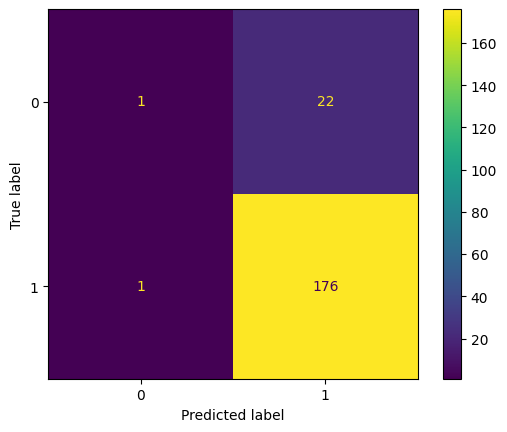

In [86]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

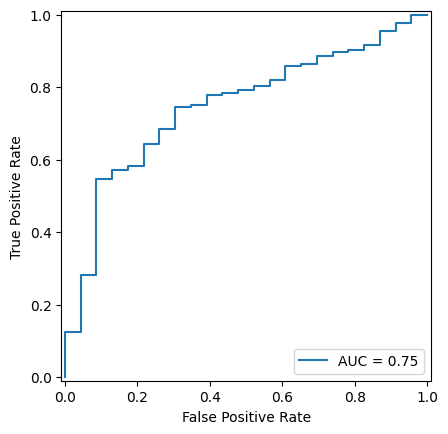

In [87]:
y_proba = log_model.predict_proba(scaled_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [88]:
from sklearn.neighbors import KNeighborsClassifier


In [89]:
param_grid={"n_neighbors":[3,5,9],"weights":["uniform", "distance"]}   
gridkn=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gridkn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9],
                         'weights': ['uniform', 'distance']})

In [90]:
gridkn.best_params_
y_pred=gridkn.predict(scaled_X_test)
y_pred
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.88


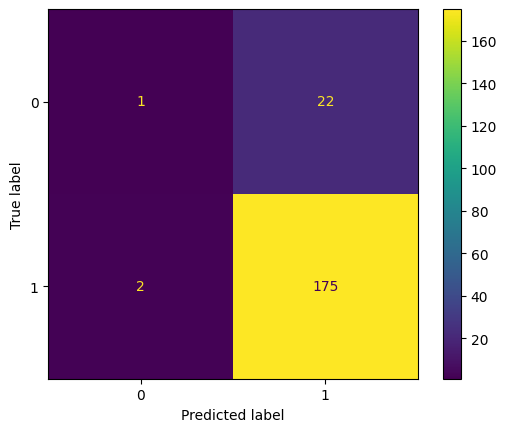

In [91]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

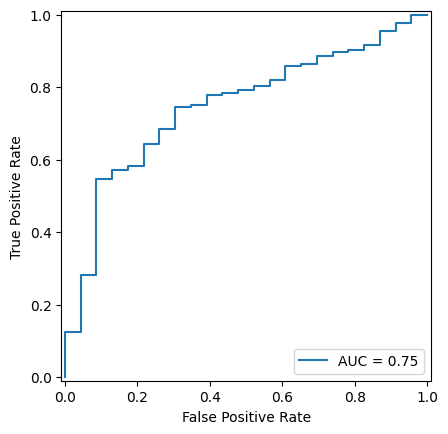

In [92]:
y_proba = log_model.predict_proba(scaled_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [93]:
from sklearn.svm import SVC
svc= SVC()

In [94]:
param_grid={"C":[0.01, 0.1,0.03,0.07], "kernel":["linear","rbf", "poly"]}

In [95]:
gridsvc= GridSearchCV(svc, param_grid, cv=5)

In [96]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.03, 0.07],
                         'kernel': ['linear', 'rbf', 'poly']})

In [97]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [98]:
y_pred= gridsvc.predict(scaled_X_test)

In [99]:
print("Accuracy: ", accuracy_score(y_test, y_pred)) 

Accuracy:  0.885


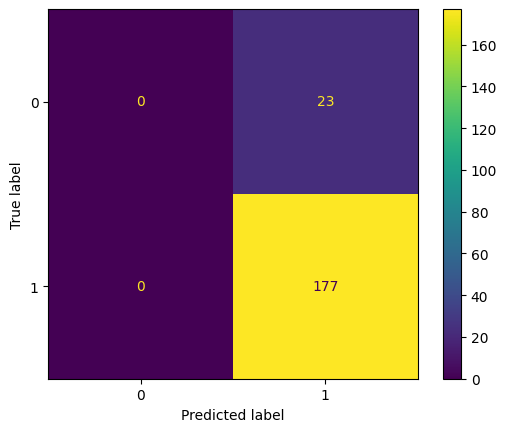

In [100]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

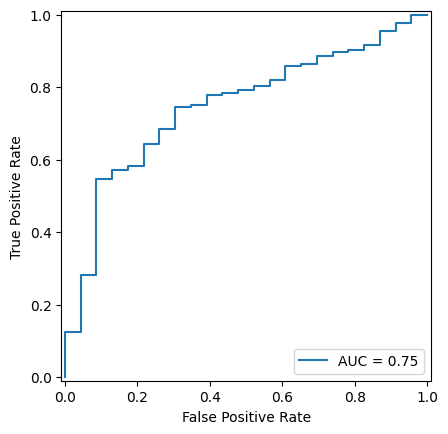

In [101]:
y_proba = log_model.predict_proba(scaled_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [102]:
from sklearn.tree import DecisionTreeClassifier


In [103]:
param_grid = {
    'criterion': ['gini', 'entropy'],         # or 'log_loss' in newer versions
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [104]:
grid_tree= GridSearchCV(DecisionTreeClassifier(),param_grid, cv=5)

In [105]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [106]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [107]:
y_pred= grid_tree.predict(scaled_X_test)

In [108]:
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.885


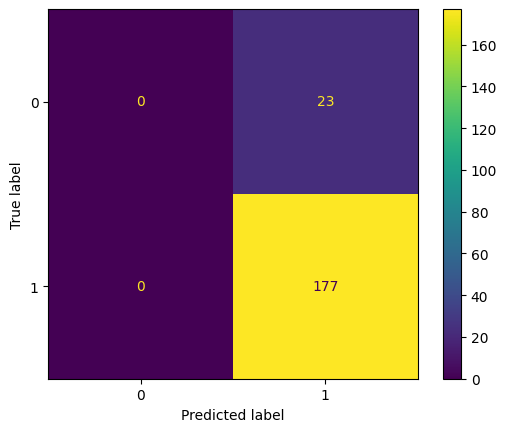

In [109]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

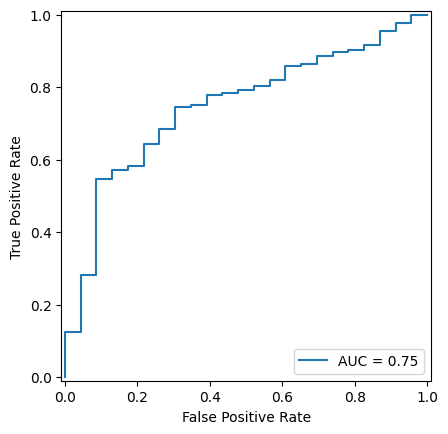

In [110]:
y_proba = log_model.predict_proba(scaled_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [111]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [112]:
param_grid = {
    'n_estimators': [100, 200, 300],
    # 'max_depth': [None, 10, 20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'max_features': [2,3,4],
    'bootstrap': [True, False]
}


In [113]:
grid_rf = GridSearchCV(rfc, param_grid, cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [100, 200, 300]})

In [114]:
grid_rf.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 300}

In [115]:
y_pred=grid_rf.predict(scaled_X_test)

In [116]:
print("ACCuracy: ", accuracy_score(y_test, y_pred))

ACCuracy:  0.86


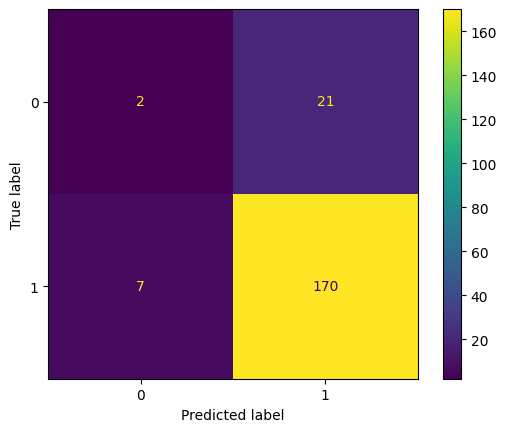

In [117]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

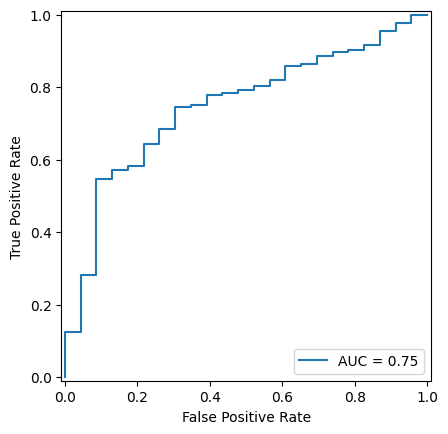

In [118]:
y_proba = log_model.predict_proba(scaled_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [124]:
best_model=grid_rf

In [125]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [126]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')

In [123]:
print(best_model.predict_proba(scaled_X_test)[:10])


[[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.32286996 0.67713004]
 [0.32286996 0.67713004]
 [0.1981982  0.8018018 ]]
